# P3

# 1.The data

In [31]:
import pandas as pd
import numpy as np

## 1.1 Load the data

In [3]:
data_body = pd.read_csv('soc-redditHyperlinks-body.tsv', sep = '\t')
data_title = pd.read_csv('soc-redditHyperlinks-title.tsv', sep = '\t')
data_body.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [5]:
data_title.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."


**Create the dataframe containing body + title links**

In [6]:
data_total = pd.concat([data_body,data_title], ignore_index = True)
print('Data total .{}'.format(data_total.shape))
print('Data body .{}'.format(data_body.shape))
print('Data title .{}'.format(data_title.shape))


Data total .(858488, 6)
Data body .(286561, 6)
Data title .(571927, 6)


In [7]:
data_total.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


**Note :** number of ligne (posts) in body : 286561
number of ligne (posts) in title : 571927
total number : 858488 = 286561 + 571927, so there is nothing in double in the 2 datasets

## 1.2 Count the number of nodes and edges

### Code

In [8]:
table = pd.DataFrame(columns = ['body', 'title', 'total'], index = ['Nodes', 'Edges', '+ edges', '- edges', 'Triads'])

nb_edges_body = data_body.shape[0]
nb_nodes_body = np.unique(np.concatenate((data_body['SOURCE_SUBREDDIT'].values , data_body['TARGET_SUBREDDIT'].values))).shape[0]

nb_edges_title = data_title.shape[0]
nb_nodes_title = np.unique(np.concatenate((data_title['SOURCE_SUBREDDIT'].values , data_title['TARGET_SUBREDDIT'].values))).shape[0]

nb_edges_total = data_total.shape[0]
nb_nodes_total = np.unique(np.concatenate((data_total['SOURCE_SUBREDDIT'].values , data_total['TARGET_SUBREDDIT'].values))).shape[0]


table.loc['Nodes'] = [nb_nodes_body, nb_nodes_title, nb_nodes_total]
table.loc['Edges'] = [nb_edges_body, nb_edges_title, nb_edges_total]

table.head()

,body,title,total
Nodes,35776,54075,67180
Edges,286561,571927,858488
+ edges,NaN,NaN,NaN
- edges,NaN,NaN,NaN
Triads,NaN,NaN,NaN


### Discussion

## 1.3 Count the proprtion of positives edges

 ### Code


In [9]:
#Number of positive (negative) edges :
#We first filter the data by keeping only +1 (or -1) values and then we find the number of lines (edges) that this filtering gives
nb_pos_edges_body = data_body[data_body['LINK_SENTIMENT']==1].shape[0] 
nb_neg_edges_body = data_body[data_body['LINK_SENTIMENT']==-1].shape[0]

nb_pos_edges_title = data_title[data_title['LINK_SENTIMENT']==1].shape[0] 
nb_neg_edges_title= data_title[data_title['LINK_SENTIMENT']==-1].shape[0]

nb_pos_edges_total = data_total[data_total['LINK_SENTIMENT']==1].shape[0] 
nb_neg_edges_total = data_total[data_total['LINK_SENTIMENT']==-1].shape[0]

#Proportion of positive/negative edges:
#We divide the number of positive (or negative) edges previouly found and divide it by the total number of edges
#We use the table1 to find the total number of edges as we already filled these informations
perc_pos_body = nb_pos_edges_body / table.loc['Edges']['body']
perc_neg_body = nb_neg_edges_body / table.loc['Edges']['body']

perc_pos_title = nb_pos_edges_title / table.loc['Edges']['title']
perc_neg_title = nb_neg_edges_title / table.loc['Edges']['title']

perc_pos_total = nb_pos_edges_total / table.loc['Edges']['total']
perc_neg_total = nb_neg_edges_total / table.loc['Edges']['total']

In [10]:
#We must indicate a percentage format : we use the {:.1%} format to have a percentage with only one decimal, as in the paper 
table.loc['+ edges'] = ['{:.1%}'.format(perc_pos_body), '{:.1%}'.format(perc_pos_title), '{:.1%}'.format(perc_pos_total)]
table.loc['- edges'] = ['{:.1%}'.format(perc_neg_body), '{:.1%}'.format(perc_neg_title), '{:.1%}'.format(perc_neg_total)]

table.head()

,body,title,total
Nodes,35776,54075,67180
Edges,286561,571927,858488
+ edges,92.6%,89.3%,90.4%
- edges,7.4%,10.7%,9.6%
Triads,NaN,NaN,NaN


### Discussion

**ANALYSIS :**
here we see +edges % is around 90 % (89.3 for hte title and 92.6% for the body). 
It is higher than the results for the 3 other datasets : Epinions (85%), Slashdot (77.4%) and Wiki (78.7%). 
/!\ Have to take into account in further analysis ! 

In [11]:
#table['remove'] = [1,2,3,0,0]
#table.head()

In [12]:
#Remove some lines with positive link to have 80%**

In [13]:
#data_remove = pd.concat((data_total[data_total['LINK_SENTIMENT']==-1], data_total[data_total['LINK_SENTIMENT']==1].head(329660)))

#nb_edges_remove = data_remove.shape[0]
#nb_nodes_remove = np.unique(np.concatenate((data_remove['SOURCE_SUBREDDIT'].values , data_remove['TARGET_SUBREDDIT'].values))).shape[0]

#nb_pos_edges_remove = data_remove[data_remove['LINK_SENTIMENT']==1].shape[0] 
#nb_neg_edges_remove = data_remove[data_remove['LINK_SENTIMENT']==-1].shape[0]

#perc_pos_remove = nb_pos_edges_remove / nb_edges_remove
#perc_neg_remove = nb_neg_edges_remove / nb_edges_remove

#table['remove'] = [nb_nodes_remove, nb_edges_remove, '{:.1%}'.format(perc_pos_remove), '{:.1%}'.format(perc_neg_remove), 0]
#table.head()

# Analysis of Time 

## Analyzing the global trend 

**NOTE FOR PART 2** : On the following analysis we will only consider the body dataset from reddit. As we will use sentiment score, it seams more relevant to use the one computed from a text than from a single title as it will be more nuanced and thus will represent better the overall idea of the post. 

### **Step 0**  : Work with datetime data

In [30]:
print('Exemple : the date of the first post of the dataset is : {}'.format(data_body['TIMESTAMP'][3]))
print(' Its type is ',type(data_body['TIMESTAMP'][3]))

Exemple : the date of the first post of the dataset is : 2013-12-31 17:37:55
 Its type is  <class 'str'>


Here the date are strings, so we need to convert them into datetime form as we want to do time manipulation (e.g. year example). 

In [33]:
# Useful libraries 
from datetime import datetime, date, time
import calendar 

In [34]:
# create the new column in the dataframe
data_body['DATETIME'] = 0.0
data_body.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,DATETIME
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",0.0
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",0.0
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",0.0
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",0.0
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0....",0.0


In [35]:
# fill this new column with the datetime content
for i in range(0, len(data_body)):
    data_body['DATETIME'][i] = datetime.strptime(data_body['TIMESTAMP'][0], "%Y-%m-%d %H:%M:%S")
data_body.head()

<ipython-input-35-508a6d45eb1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_body['DATETIME'][i] = datetime.strptime(data_body['TIMESTAMP'][0], "%Y-%m-%d %H:%M:%S")
/home/laurine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,DATETIME
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",2013-12-31 16:39:58
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",2013-12-31 16:39:58
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",2013-12-31 16:39:58
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",2013-12-31 16:39:58
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0....",2013-12-31 16:39:58


In [73]:
data_body['DATETIME2'] = pd.to_datetime(data_body['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [74]:
data_body.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,DATETIME,DATETIME2
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",2013-12-31 16:39:58,2013-12-31 16:39:58
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",2013-12-31 16:39:58,2013-12-31 18:18:37
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",2013-12-31 16:39:58,2014-01-01 14:54:35
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",2013-12-31 16:39:58,2013-12-31 17:37:55
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0....",2013-12-31 16:39:58,2014-01-01 02:51:13


In [75]:
print(type(data_body['DATETIME2'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [67]:
data_body['DATETIME'] = data_body['DATETIME'].dropna()

**Split the dataset into positive and negative edges**

*Positif*

In [81]:
body_pos = data_body.copy()
body_pos = body_pos.drop(body_pos[body_pos.LINK_SENTIMENT == -1.0].index)
print('data body original .{}'.format(data_body.shape))
print('body POS {}'.format(body_pos.shape))

data body original .(286561, 8)
body pos (265491, 8)


In [85]:
print('In data body : sign of post 4 = ', data_body.iloc[1][4])
print('In body pos : sign of post 4 = ', body_pos.iloc[1][4])

In data body : sign of post 4 =  -1
In body pos : sign of post 4 =  1


*Negatif*

In [93]:
body_neg = data_body.copy()
body_neg= body_neg.drop(body_pos[body_pos.LINK_SENTIMENT == 1.0].index)
print('data body original .{}'.format(data_body.shape))
print('body NEG {}'.format(body_neg.shape))

data body original .(286561, 8)
body NEG (21070, 8)


In [96]:
print('In data body : sign of post 4 = ', data_body.iloc[0][4])
print('In body pos : sign of post 4 = ', body_neg.iloc[0][4])

In data body : sign of post 4 =  1
In body pos : sign of post 4 =  -1


### Step 1 : Analysis of the year

In [68]:
import matplotlib.pyplot as plt

In [105]:
# verify the type of data time 
print(type(data_body.DATETIME2[0]))
print(type(body_pos.DATETIME2[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [127]:
# Just to have an idea of what it'll look like. 
year_positive = body_pos.groupby(data_body['DATETIME2'].dt.year).size()
year_negative = body_pos.groupby(data_body['DATETIME2'].dt.year).size()

print('Year Positive', year_positive)
print('Year Negative', year_negative)

Year Positive DATETIME2
2013        6
2014    58522
2015    82189
2016    90819
2017    33955
dtype: int64
Year Negative DATETIME2
2013        6
2014    58522
2015    82189
2016    90819
2017    33955
dtype: int64


So there are 5 years presented in the dataset : 2013, 2014, 2015, 2016 and 2017. 

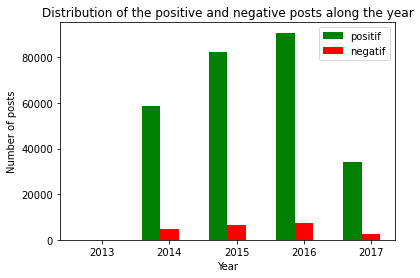

In [134]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

 
year_pos = body_pos.groupby(data_body['DATETIME2'].dt.year).size()
rects1 = ax.bar(ind, year_pos, width, color='g')
year_neg = body_neg.groupby(data_body['DATETIME2'].dt.year).size()
rects2 = ax.bar(ind+width, year_neg, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Year')
ax.set_title('Distribution of the positive and negative posts along the year')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2013', '2014', '2015', '2016', '2017') )
ax.legend( (rects1[0], rects2[0]), ('positif', 'negatif') )

plt.show()

**Analysis :** 
- the number of post in 2013 is inexistant on the graph

In [122]:
print('The number of positive posts in 2013 is ', vals_pos.iloc[0])
print('The number of negative posts in 2013 is ', vals_neg.iloc[0])
print('So the total number of posts in 2013 is {} while in 2016 it is {}'.format(vals_pos.iloc[0]+vals_neg.iloc[0], vals_pos.iloc[3]+vals_neg.iloc[3]))

The number of positive posts in 2013 is  6
The number of negative posts in 2013 is  1
So the total number of posts in 2013 is 7 while in 2016 it is 98229


As we can see here, it might come from a problem of scale, as the amount of posts during 2013 is very very small compared to the number of posts 2016. It could be explained by the gain of popularity of the website, or the change in behavior of the population (who is more and more connected via internet and social network, and have better access to technology). 

- the brutal decrease in 2017 in both positive and negative edges might be explained by loose of popularity, or the apparition of another website more performant than reddit. 

- the number of negative posts is quite constant among the year 2014-2015-2016
- the number of positive posts increases between 2014 - 2016 

**Ccl :** In order to assess the impact of the **YEAR** on the structure of the network, we can compare 2 subgraphs : 
> - from the year 2014
> - from the year 2016 

### Step 2: Analysis of the month 

In [128]:
month_positive = body_pos.groupby(data_body['DATETIME2'].dt.month).size()
month_negative = body_pos.groupby(data_body['DATETIME2'].dt.month).size()
print('Month Positive', month_positive)
print('Month Negative', month_negative)

Month Positive DATETIME2
1     26068
2     26385
3     28684
4     27303
5     18860
6     19599
7     20619
8     21400
9     18128
10    19508
11    19046
12    19891
dtype: int64
Month Negative DATETIME2
1     26068
2     26385
3     28684
4     27303
5     18860
6     19599
7     20619
8     21400
9     18128
10    19508
11    19046
12    19891
dtype: int64


So 12 months are represented : 01 ... 12 in the dataset. 

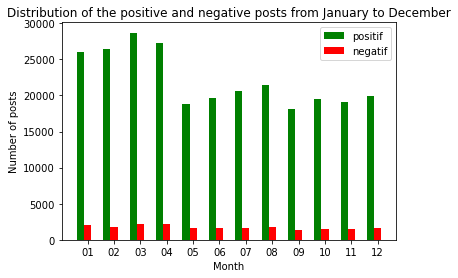

In [135]:
N = 12
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

 
month_pos = body_pos.groupby(data_body['DATETIME2'].dt.month).size()
rects1 = ax.bar(ind, month_pos, width, color='g')
month_neg = body_neg.groupby(data_body['DATETIME2'].dt.month).size()
rects2 = ax.bar(ind+width, month_neg, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Month')
ax.set_title('Distribution of the positive and negative posts from January to December')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'))
ax.legend( (rects1[0], rects2[0]), ('positif', 'negatif') )

plt.show()

**Analysis :**
- All the month do have posts
- The difference between the number of positive and negative posts is huge, all along the year and depsite intern fluctation
- The number of negative posts can be considered quite constant along the months as its variation is significantly smaller than the one for positive posts counts. (**Computer statistical measure of the variation ??**)
- For positive vote we can identify two big part. The first one from 01 to 04 included, which has number of counts around 25 000 - 30 000, and the second one from 05 to 12, whish has number of counts around 20 000


In [153]:
import statistics

In [163]:
mean_0104_pos = statistics.mean([month_pos.iloc[0], month_pos.iloc[1], month_pos.iloc[2], month_pos.iloc[3]])
print('The mean count of posts from jan. to apr. is ', mean_0104_pos)
print('The difference between number of counts and mean for jan. feb. march and april is respectively: \n',[abs(x - mean_0104_pos) for x in [month_pos.iloc[0], month_pos.iloc[1], month_pos.iloc[2], month_pos.iloc[3]]])

The mean count of posts from jan. to apr. is  27110
The difference between number of counts and mean for jan. feb. march and april is respectively: 
 [1042, 725, 1574, 193]


So we see that the average value of positive post between january and april is 27110. We also see that the month with the number of counts the closer to this mean is april (it as the small difference, 193).

In [164]:
mean_0512_pos = statistics.mean([month_pos.iloc[4], month_pos.iloc[5], month_pos.iloc[6], month_pos.iloc[7], month_pos.iloc[8], month_pos.iloc[9], month_pos.iloc[10], month_pos.iloc[11]])
print('The mean count of posts from jan. to apr. is ', mean_0512_pos)
print('The difference between number of counts and mean for jan. feb. march and april is respectively: \n',[abs(x - mean_0512_pos) for x in [month_pos.iloc[4], month_pos.iloc[5], month_pos.iloc[6], month_pos.iloc[7], month_pos.iloc[8], month_pos.iloc[9], month_pos.iloc[10], month_pos.iloc[11]]])

The mean count of posts from jan. to apr. is  19631
The difference between number of counts and mean for jan. feb. march and april is respectively: 
 [771, 32, 988, 1769, 1503, 123, 585, 260]


So we see that the average number of positive counts between may and december is 19 631. We also see tha the month which has the closed number of counts compared to the average is june because is has the smalle difference (32).

**Ccl :** In order to assess the impact of the **MONTH** on the structure of the network, we can compare 2 subgraphs : 
> - from april (representative of the first group, with counts between 25 000 and 30 000)
> - from june (representative of the second group, with counts around 20 000)

### Step 3: Analysis of the day

In [165]:
day_positive = body_pos.groupby(data_body['DATETIME2'].dt.day).size()
day_negative = body_pos.groupby(data_body['DATETIME2'].dt.day).size()
print('Month Positive', day_positive)
print('Month Negative', day_negative)

Month Positive DATETIME2
1     8651
2     9225
3     8881
4     8321
5     8576
6     8792
7     8391
8     8463
9     8516
10    8744
11    8905
12    8655
13    8707
14    8350
15    8936
16    9220
17    9145
18    8801
19    8576
20    9160
21    8503
22    8740
23    8622
24    8713
25    8601
26    8468
27    8988
28    8667
29    8008
30    8113
31    5053
dtype: int64
Month Negative DATETIME2
1     8651
2     9225
3     8881
4     8321
5     8576
6     8792
7     8391
8     8463
9     8516
10    8744
11    8905
12    8655
13    8707
14    8350
15    8936
16    9220
17    9145
18    8801
19    8576
20    9160
21    8503
22    8740
23    8622
24    8713
25    8601
26    8468
27    8988
28    8667
29    8008
30    8113
31    5053
dtype: int64


So we see that all the 31 days of a month are represented in the dataset. 

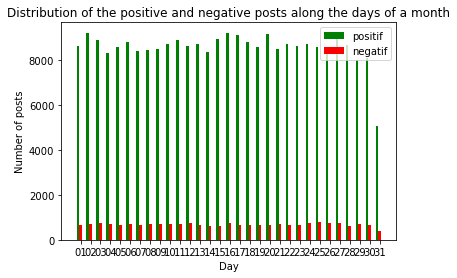

In [174]:
N = 31
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

 
day_pos = body_pos.groupby(data_body['DATETIME2'].dt.day).size()
rects1 = ax.bar(ind, day_pos, width, color='g')
day_neg = body_neg.groupby(data_body['DATETIME2'].dt.day).size()
rects2 = ax.bar(ind+width, day_neg, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Day')
ax.set_title('Distribution of the positive and negative posts along the days of a month')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26' ,'27', '28', '29', '30', '31'))
ax.legend((rects1[0], rects2[0]), ('positif', 'negatif'))

plt.show()

**Analysis :** 
- graph not very lisible (**Change the size ?**)
- the abrupt decrease for day 31 is because only half of the month in a year have a 31th day, so obviously there are less posts (pos and neg) done that day
- the amount of positive post is very small compared to amount of positif posts, for all the days 
- General manner : both positive and negative counts seams to be relatively constant along the days of a month, they are some fluctuations (more visible for positive posts) but it is hard to highlight clear trend. 

**Ccle :** We need to do further analysis on the days to be able to identify trends. So we are going to look at the number of posts according to the day of the weem: monday, tuesday ... sunday. 

#### Step 3 : cont. Analysis day of the week

In [175]:
day_positive = body_pos.groupby(data_body['DATETIME2'].dt.weekday).size()
day_negative = body_pos.groupby(data_body['DATETIME2'].dt.weekday).size()
print('Month Positive', day_positive)
print('Month Negative', day_negative)

Month Positive DATETIME2
0    40159
1    40843
2    39901
3    39640
4    37585
5    32792
6    34571
dtype: int64
Month Negative DATETIME2
0    40159
1    40843
2    39901
3    39640
4    37585
5    32792
6    34571
dtype: int64


So the days reprensented in the dataset are from 0 (monday) to 6 (sunday). 

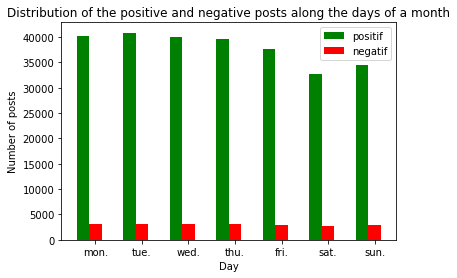

In [179]:
N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

 
dayw_pos = body_pos.groupby(data_body['DATETIME2'].dt.weekday).size()
rects1 = ax.bar(ind, dayw_pos, width, color='g')
dayw_neg = body_neg.groupby(data_body['DATETIME2'].dt.weekday).size()
rects2 = ax.bar(ind+width, dayw_neg, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Day')
ax.set_title('Distribution of the positive and negative posts along the days of a month')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('mon.', 'tue.', 'wed.', 'thu.', 'fri.', 'sat.', 'sun.'))
ax.legend((rects1[0], rects2[0]), ('positif', 'negatif'))

plt.show()

**Analysis :**
- As for the other parameter (year, month, day of the month), the amount of positive posts is higher than the amount of negative posts
- The amount of negative posts is quite constant along the week 
- the amount of positive posts is smaller the week end, and quite constant during the week. It might be explained by the routine of the week, so the habits of beeing on the website for coffe break for example, while the week end, the events are more random and technology connection can be smaller. 


In [177]:
mean_monfrid_pos = statistics.mean([dayw_pos.iloc[0], dayw_pos.iloc[1], dayw_pos.iloc[2], dayw_pos.iloc[3], dayw_pos.iloc[4]])
print('The mean count of posts from monday. to friday. is ', mean_monfrid_pos)
print('The difference between number of counts and mean for monday, tuesday, wednesday, thursday and friday respectively: \n',[abs(x - mean_monfrid_pos) for x in [dayw_pos.iloc[0], dayw_pos.iloc[1], dayw_pos.iloc[2], dayw_pos.iloc[3], dayw_pos.iloc[4]]])

The mean count of posts from monday. to friday. is  39625
The difference between number of counts and mean for monday, tuesday, wednesday, thursday and friday respectively: 
 [534, 1218, 276, 15, 2040]


So we see that the average of positive posts along the 'work week' (monday to friday) is 39 625. And we see that the day with the closer amount of posts to the average is thursday, because the difference is the smaller (15). 

In [180]:
mean_satsun_pos = statistics.mean([dayw_pos.iloc[5], dayw_pos.iloc[6]])
print('The mean count of posts from monday. to friday. is ', mean_satsun_pos)
print('The difference between number of counts and mean for saturday and sunday respectively: \n',[abs(x - mean_satsun_pos) for x in [dayw_pos.iloc[5], dayw_pos.iloc[6]]])

The mean count of posts from monday. to friday. is  33681
The difference between number of counts and mean for saturday and sunday respectively: 
 [889, 890]


So here we see the average number of posts for the weekend drop at 33 681. And we see that both saturday and sunday are at equal distance. 
As we want to be representative of the week end in our analysis, we will choose sunday, because some people are still working on the saturday and thus might have the same behavior as during the week. Thus sunday is more representative of the weekend for everyone. 

In [ ]:
**Ccl :** In order to assess the impact of the **DAY OF THE WEEK** on the structure of the network, we can compare 2 subgraphs : 
> - from thursday (representative of 'work week')
> - from june (representative of the second group, with counts around 20 000)